In [1]:
####Task1: Merging 12 months of sales data into a single csv file

import pandas
import os
os.listdir()



files = [file for file in os.listdir('./Sales_Data')]
yearly_data_dataframe=pandas.DataFrame()

for file in files:
    monthly_data_dataframe=pandas.read_csv("./Sales_Data/"+file)
    yearly_data_dataframe=pandas.concat([yearly_data_dataframe,monthly_data_dataframe])

yearly_data_dataframe.to_csv('yearly_sales_data.csv',index=False)


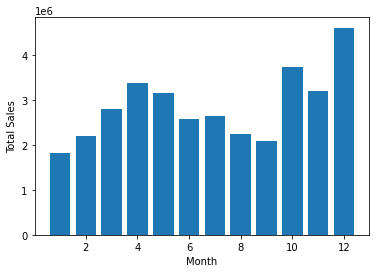

In [88]:
####Task2: What month has the highest sales and what was the sales amount

###First we need to clean the data of NaNs and repetive headers
yearly_data_dataframe.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

yearly_data_dataframe

yearly_data_dataframe = yearly_data_dataframe[yearly_data_dataframe.Product != 'Product']

yearly_data_dataframe.to_csv('yearly_sales_data_rev2.csv',index=False)

###Now we need to create a month column that will store the converted Order date strings month as a number representing the month
date_ordered=yearly_data_dataframe.iloc[:,4]

from datetime import datetime
month=[]
hour=[]
for dates in date_ordered:
    date_time_obj=(datetime.strptime(dates, '%m/%d/%y %H:%M'))
    month.append(date_time_obj.month)
    hour.append(date_time_obj.hour)
    
yearly_data_dataframe['Month']=month
yearly_data_dataframe['Hour']=hour

##now we need to create a new column that reflects the value of the total sale, meaning quantity ordered multiplied by the price of each

yearly_data_dataframe['Total Sale']=yearly_data_dataframe['Quantity Ordered'].astype(int)*yearly_data_dataframe['Price Each'].astype(float)
temp_dataframe=yearly_data_dataframe
results=temp_dataframe.groupby(['Month']).sum()

import matplotlib.pyplot as plt

months=range(1,13)
plt.bar(months,results['Total Sale'])
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()

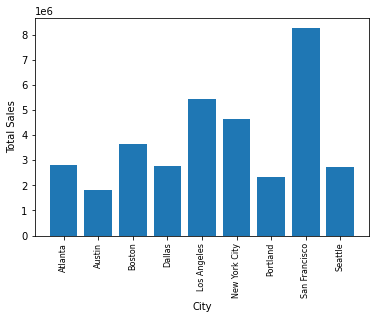

,Quantity Ordered,Price Each,Month,Hour,Total Sale
City,,,,,
Atlanta,16602,2.779908e+06,104794,214264,2.795499e+06
Austin,11153,1.809874e+06,69829,141946,1.819582e+06
Boston,22528,3.637410e+06,141112,288225,3.661642e+06
Dallas,16730,2.752628e+06,104620,214390,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,427444,5.452571e+06
New York City,27932,4.635371e+06,175741,357696,4.664317e+06
Portland,14053,2.307747e+06,87765,179632,2.320491e+06
San Francisco,50239,8.211462e+06,315520,643265,8.262204e+06
Seattle,16553,2.733296e+06,104941,213292,2.747755e+06


In [89]:
##Task 3: What US city was responsible for the most sales
#we need to split the purchase adress into a list

address_list=yearly_data_dataframe['Purchase Address'].str.split(", ")
list(address_list)
street_num=[]
city_name=[]
postal_code=[]

for street, city, post in address_list:
    street_num.append(street)
    city_name.append(city)
    postal_code.append(post)

#these can be used at a later time to map the purchases on a map
#now we create another column to store the city data

yearly_data_dataframe["City"]=city_name
results_2=yearly_data_dataframe.groupby(['City']).sum()


import matplotlib.pyplot as plt

cities=[city for city, df in yearly_data_dataframe.groupby('City')]
plt.bar(cities,results_2['Total Sale'])
plt.ylabel("Total Sales")
plt.xlabel("City")
plt.xticks(cities,rotation='vertical',size=8)
plt.show()

results_2

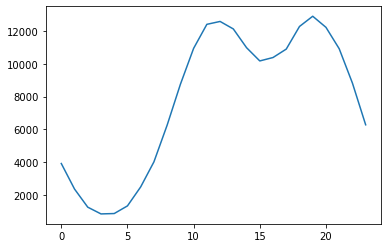

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale,City
Hour,,,,,,,,,
19,12905,12905,12905,12905,12905,12905,12905,12905,12905
12,12587,12587,12587,12587,12587,12587,12587,12587,12587
11,12411,12411,12411,12411,12411,12411,12411,12411,12411
18,12280,12280,12280,12280,12280,12280,12280,12280,12280
20,12228,12228,12228,12228,12228,12228,12228,12228,12228
13,12129,12129,12129,12129,12129,12129,12129,12129,12129
14,10984,10984,10984,10984,10984,10984,10984,10984,10984
10,10944,10944,10944,10944,10944,10944,10944,10944,10944
21,10921,10921,10921,10921,10921,10921,10921,10921,10921


In [4]:
#Task 4: Waht time should we display advertisement in order to maximise the likelihood of a customer buying a product
#to do this we will need to get hour values from the order date dataset and count the number of times that the hour appears 

os.listdir()
yearly_data_dataframe
results_3=yearly_data_dataframe.groupby(['Hour']).count()
results_3

import matplotlib.pyplot as plt

months=range(0,24)
plt.plot(months,results_3['Total Sale'])
plt.show()

results_3.sort_values(by=['Total Sale'],ascending=False)
##Advertisements should be made between 19:00 and 19:59 aswell as 12:00 and 12:59

In [85]:
#Task 5: Which Products are most often sold together
#the order IDs are them same if the order date and the address are the same
#we need to count the duplicate ID

new_dataframe=yearly_data_dataframe[yearly_data_dataframe['Order ID'].duplicated(keep=False)]
new_dataframe['Grouped']=new_dataframe.groupby('Order ID')['Product'].transform(lambda x:', '.join(x))

new_dataframe=new_dataframe[['Order ID','Grouped']].drop_duplicates()
new_dataframe

#now we count the pairs
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_dataframe['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

TypeError: <lambda>() got an unexpected keyword argument 'errors'

<ipython-input-86-70a6bcfd42ec>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
<ipython-input-86-70a6bcfd42ec>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


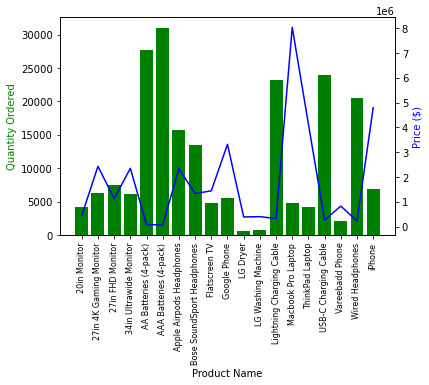

In [86]:
#Task 6: What product sold the most and  why?
yearly_data_dataframe['Quantity Ordered'] = pandas.to_numeric(yearly_data_dataframe['Quantity Ordered'], errors='ignore')
yearly_data_dataframe['Price Each'] = pandas.to_numeric(yearly_data_dataframe['Price Each'], errors='ignore')
df = yearly_data_dataframe.groupby('Product', as_index=False).sum()
products=df['Product']
quantity=df['Quantity Ordered']
price=df['Price Each']


import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, price, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

#AAA Batteries are the best sellers probably because of their low price